<a href="https://colab.research.google.com/github/marialuisamartins/tech_fase4/blob/main/Tech_fase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech challenge fase 4

## Importando o arquivo do ipea do github para o notebook

In [51]:
import pandas as pd

# Comando de download usando wget
os.system("wget 'https://raw.githubusercontent.com/marialuisamartins/tech_fase4/6ad3e07bc901fd984eedb3030510b2816aaf7383/ipeadata%5B03-11-2024-01-09%5D.xlsx' -O ipeadata.xlsx")

# Read the Excel file using pd.read_excel, optionally specifying the engine
ipeadata = pd.read_excel('ipeadata.xlsx', engine='openpyxl') # engine='openpyxl' is the default and generally won't need to be specified for .xlsx files
# if this file were a .xls you would need to change it to engine='xlrd'

## Análise exploratória e tratamento de nulos e tipos de dado

In [52]:
ipeadata.head()

,data,preco
0,20/05/1987,18.63
1,21/05/1987,18.45
2,22/05/1987,18.55
3,23/05/1987,NaN
4,24/05/1987,NaN


In [9]:
ipeadata.shape

(13677, 2)

In [12]:
ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13677 entries, 0 to 13676
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    13677 non-null  object 
 1   preco   11287 non-null  float64
dtypes: float64(1), object(1)
memory usage: 213.8+ KB


In [25]:
# Converte a coluna 'data' para o tipo datetime
ipeadata['data'] = pd.to_datetime(ipeadata['data'], errors='coerce')

<ipython-input-25-23c78218cb57>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ipeadata['data'] = pd.to_datetime(ipeadata['data'], errors='coerce')


In [14]:
ipeadata.describe()

,preco
count,11287.000000
mean,53.303132
std,33.169358
min,9.100000
25%,20.605000
50%,48.880000
75%,76.845000
max,143.950000


In [10]:
ipeadata.isnull().sum()

,0
data,0
preco,2390


In [20]:
# Remover linhas com nulos na coluna 'preco'
ipeadata.dropna(subset=['preco'], inplace=True)

In [21]:
ipeadata.isnull().sum()

,0
data,0
preco,0


## Análise utilizando gráficos

In [23]:
import matplotlib.pyplot as plt

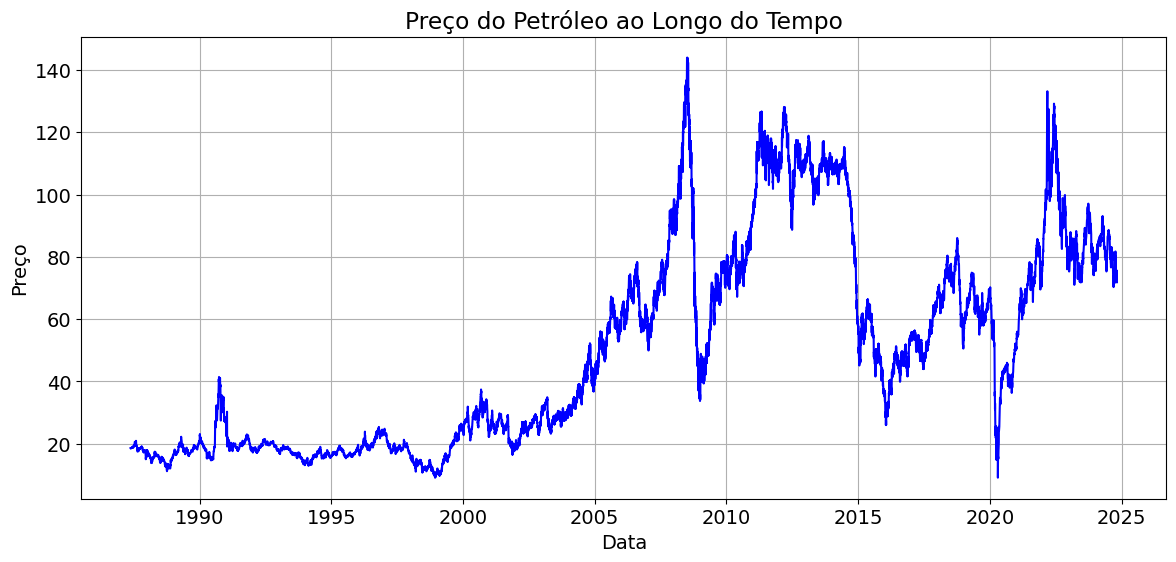

In [26]:
# Configurando o gráfico de linha
plt.figure(figsize=(14, 6))
plt.plot(ipeadata['data'], ipeadata['preco'], color='blue')
plt.title('Preço do Petróleo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

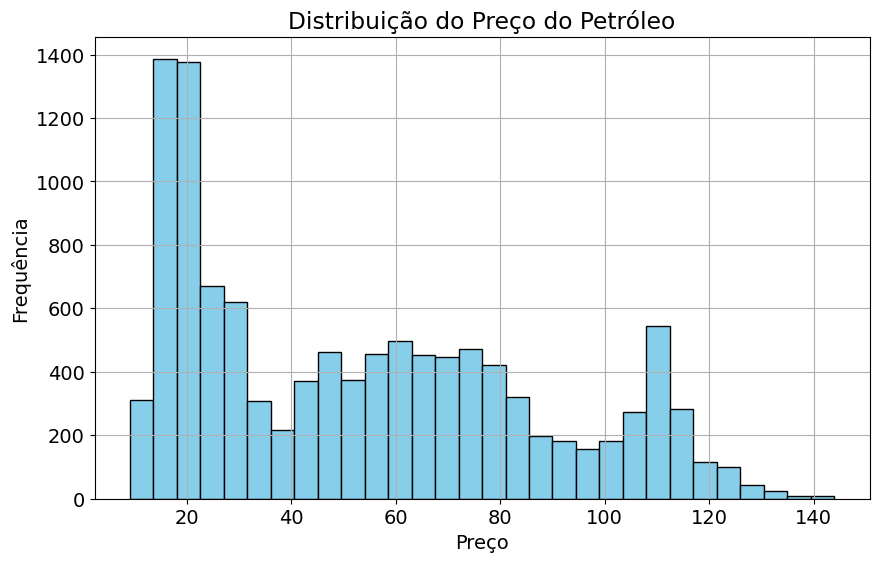

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(ipeadata['preco'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Preço do Petróleo')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

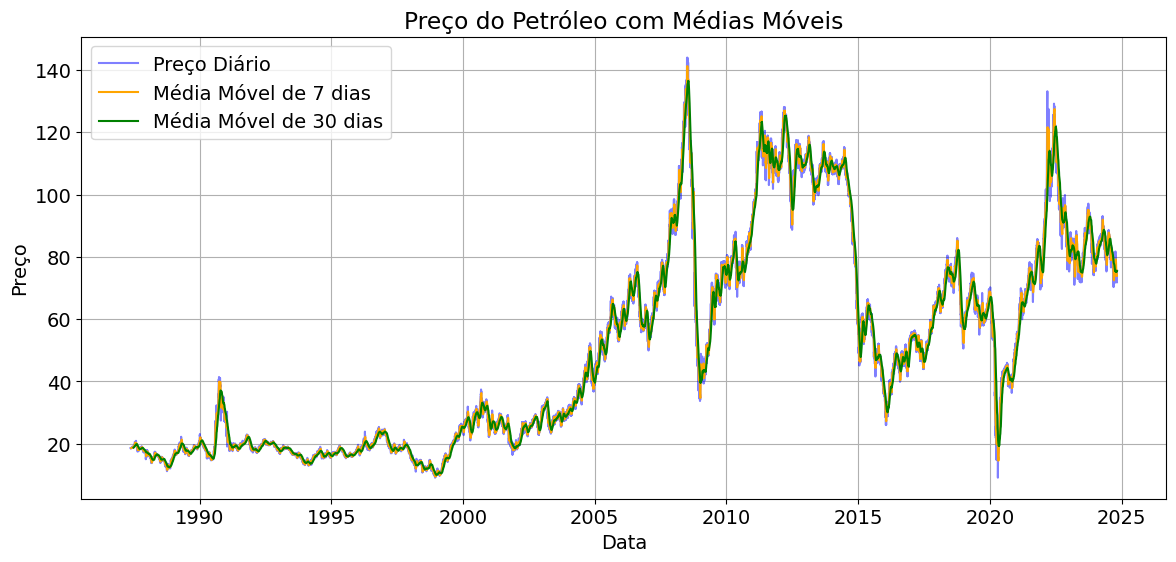

In [28]:
# Definindo janelas para médias móveis
ipeadata['media_movel_7'] = ipeadata['preco'].rolling(window=7).mean()
ipeadata['media_movel_30'] = ipeadata['preco'].rolling(window=30).mean()

# Plotando o preço e as médias móveis
plt.figure(figsize=(14, 6))
plt.plot(ipeadata['data'], ipeadata['preco'], label='Preço Diário', color='blue', alpha=0.5)
plt.plot(ipeadata['data'], ipeadata['media_movel_7'], label='Média Móvel de 7 dias', color='orange')
plt.plot(ipeadata['data'], ipeadata['media_movel_30'], label='Média Móvel de 30 dias', color='green')
plt.title('Preço do Petróleo com Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

## Modelo de machine learning

In [53]:
os.system("pip install statsmodels")

0

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

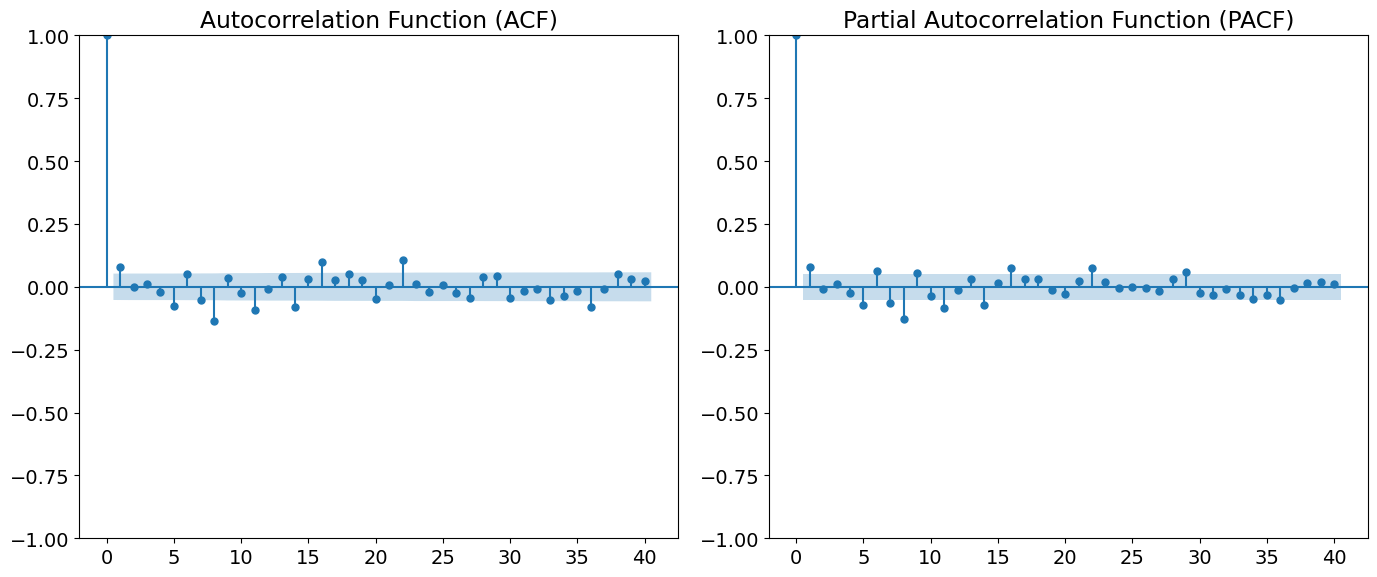

In [38]:
# Filtrar dados a partir de 2021 - pós covid-19
ipeadata_filtered = ipeadata.loc['2021-01-01':].copy()

# Configura 'data' como índice e define frequência diária
ipeadata_filtered = ipeadata_filtered.asfreq('D')

# Realizar a diferenciação da série para garantir estacionaridade
ipeadata_filtered['preco_diff'] = ipeadata_filtered['preco'].diff().dropna()

# Plotando ACF e PACF para determinar p e q
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(ipeadata_filtered['preco_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(ipeadata_filtered['preco_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Interpretação dos Gráficos

*   ACF:

Observe o primeiro decaimento significativo no gráfico ACF para estimar o valor de 𝑞


Um corte rápido para zero após alguns lags indica um valor baixo para 𝑞, enquanto uma cauda prolongada pode sugerir um valor maior.


*  PACF:

O primeiro lag significativo no gráfico PACF indica o valor de 𝑝.


Se o gráfico PACF decai rapidamente para zero após poucos lags, sugere que o valor de 𝑝 seja baixo. Se apresenta uma cauda prolongada, pode indicar um 𝑝 mais alto.

> Esses gráficos ajudarão a definir os parâmetros ideais para o modelo ARIMA. Em seguida, você pode testar as combinações de p,d, e q para obter o melhor ajuste.


<ipython-input-40-3c3c637ff9af>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Previsão para o próximo dia: {forecast[0]:.2f}")


Previsão para o próximo dia: 71.77


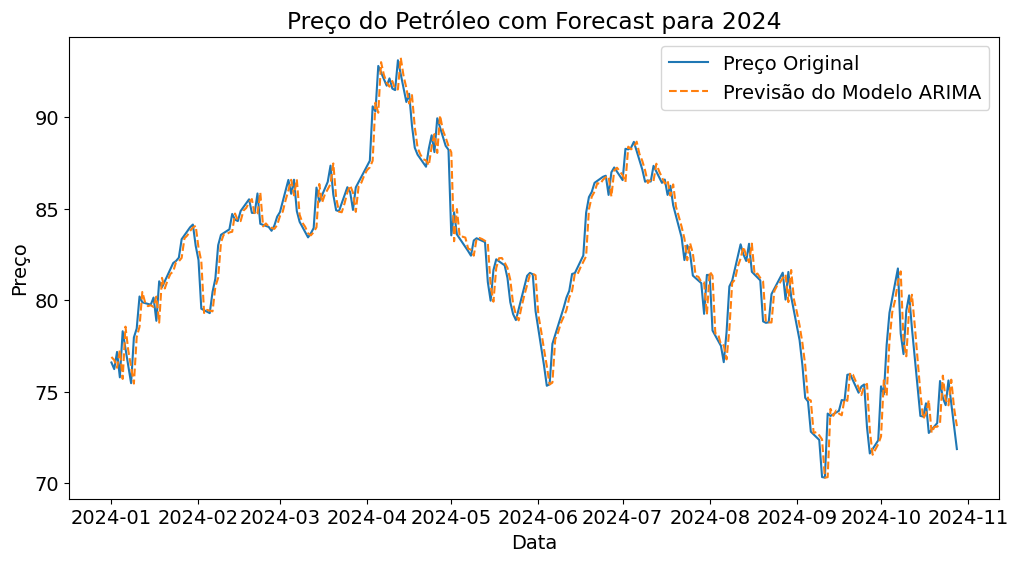

In [40]:
# Ajuste do modelo ARIMA (defina p, d, q conforme análise dos gráficos ACF e PACF)
model = ARIMA(ipeadata_filtered['preco'], order=(5, 1, 0))  # Exemplo; ajuste conforme necessário
model_fit = model.fit()

# Forecast para o próximo dia
forecast = model_fit.forecast(steps=1)
print(f"Previsão para o próximo dia: {forecast[0]:.2f}")

# Adiciona a previsão ao dataframe para visualização
ipeadata_filtered['previsao'] = model_fit.predict(start=0, end=len(ipeadata_filtered)-1)

# Filtra para exibir apenas o ano de 2024
ipeadata_2024 = ipeadata_filtered[ipeadata_filtered.index.year == 2024]

# Plotando o gráfico de 2024
plt.figure(figsize=(12, 6))
plt.plot(ipeadata_2024['preco'], label='Preço Original')
plt.plot(ipeadata_2024['previsao'], label='Previsão do Modelo ARIMA', linestyle='--')
plt.title('Preço do Petróleo com Forecast para 2024')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

***overfitting?***

1. Revisar o AIC e o BIC: Valores menores desses critérios geralmente indicam um modelo mais apropriado. Ajustar o modelo com base no menor AIC ou BIC pode ajudar a evitar o overfitting.

2. Realizar Cross-Validation (Validação Cruzada): Embora a validação cruzada seja mais complexa para séries temporais, o método "Time Series Split" pode ser útil.

3. Testar Parâmetros Mais Simples: Diminuir os valores de p, d, e q e usar um conjunto de testes pode indicar se um modelo mais simples mantém uma performance aceitável sem overfitting.

## Planejamento do Deploy em Produção do Modelo

Primeiro, defina as ferramentas e o fluxo de trabalho para o deploy em produção, levando em conta:

*  Modelo e Frameworks: Certifique-se de que o modelo ARIMA, as bibliotecas de machine learning e os scripts estejam prontos e integrados.
*  Infraestrutura para Automação: Utilize ferramentas de automação (ex.: CRON no Linux ou serviços como AWS Lambda) para agendar a execução diária do modelo.
*  Banco de Dados ou Armazenamento em Nuvem: Configure um banco de dados (como MySQL, PostgreSQL) ou use armazenamento em nuvem (como AWS S3 ou Google Cloud Storage) para salvar os resultados diários da previsão.
*  Integração com Power BI: Utilize uma fonte de dados que o Power BI possa consultar e atualizar automaticamente, como uma URL com um arquivo JSON/CSV atualizado pelo Streamlit ou por uma API.

## Criar o MVP do Modelo em Produção com Streamlit

Para desenvolver um MVP com Streamlit, você pode criar uma interface simples que exibe a previsão diária do preço do petróleo e salva os resultados em um arquivo CSV ou JSON acessível pelo Power BI.

In [41]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [48]:
import streamlit as st
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import datetime

# Função para carregar os dados e ajustar o modelo
def forecast_model(data):
    # Definir explicitamente a frequência para evitar o warning sobre a falta de informação de frequência
    data = data.asfreq('D')  # Define a frequência como diária

    modelo = ARIMA(data['preco'], order=(2, 1, 2))  # Ajuste com os parâmetros adequados
    modelo_fit = modelo.fit()
    forecast = modelo_fit.forecast(steps=1)

    # Corrigir o acesso à previsão usando .iloc para acessar a previsão corretamente
    return forecast.iloc[0]

# Gera a previsão
previsao_hoje = forecast_model(ipeadata_filtered)

# Mostra a previsão na interface Streamlit
st.title("Previsão Diária do Preço do Petróleo")
st.write(f"Previsão para o próximo dia: {previsao_hoje:.2f}")

# Criar diretório para salvar o arquivo se não existir
output_dir = './previsao_output'
os.makedirs(output_dir, exist_ok=True)

# Salvar a previsão em um arquivo CSV no diretório atual
forecast_df = pd.DataFrame({'Data': [datetime.date.today()], 'Previsao_Prec': [previsao_hoje]})
forecast_df.to_csv(f'{output_dir}/previsao_petroleo.csv', index=False)

# Exibir o link para download do arquivo CSV
st.write("A previsão foi salva com sucesso!")
st.download_button(
    label="Baixar previsão",
    data=forecast_df.to_csv(index=False).encode(),
    file_name="previsao_petroleo.csv",
    mime="text/csv"
)

2024-11-11 22:26:44.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 22:26:44.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

False

## Como Rodar o Streamlit:

Salve o código acima em um arquivo Python (por exemplo, forecast_app.py).

Para rodar o Streamlit, execute o seguinte comando no terminal (onde forecast_app.py é o nome do seu arquivo):

`streamlit run forecast_app.py`

No navegador, a interface do Streamlit será carregada, e você poderá visualizar a previsão e também baixar o arquivo CSV com a previsão de preços.